In [43]:

import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
from plotnine import *
from plotnine.data import *

In [44]:
flights = pd.read_csv('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv',header = 0)
airports = pd.read_csv('https://raw.githubusercontent.com/tidyverse/nycflights13/main/data-raw/airports.csv',header = 0)
flights.head()

Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0           1  2013      1    1     517.0        2.0     830.0       11.0   
1           2  2013      1    1     533.0        4.0     850.0       20.0   
2           3  2013      1    1     542.0        2.0     923.0       33.0   
3           4  2013      1    1     544.0       -1.0    1004.0      -18.0   
4           5  2013      1    1     554.0       -6.0     812.0      -25.0   

  carrier tailnum  flight origin dest  air_time  distance  hour  minute  
0      UA  N14228    1545    EWR  IAH     227.0      1400   5.0    17.0  
1      UA  N24211    1714    LGA  IAH     227.0      1416   5.0    33.0  
2      AA  N619AA    1141    JFK  MIA     160.0      1089   5.0    42.0  
3      B6  N804JB     725    JFK  BQN     183.0      1576   5.0    44.0  
4      DL  N668DN     461    LGA  ATL     116.0       762   5.0    54.0

In [45]:
airports.head()

faa                           name        lat        lon   alt  tz dst  \
0  04G              Lansdowne Airport  41.130472 -80.619583  1044  -5   A   
1  06A  Moton Field Municipal Airport  32.460572 -85.680028   264  -6   A   
2  06C            Schaumburg Regional  41.989341 -88.101243   801  -6   A   
3  06N                Randall Airport  41.431912 -74.391561   523  -5   A   
4  09J          Jekyll Island Airport  31.074472 -81.427778    11  -5   A   

              tzone  
0  America/New_York  
1   America/Chicago  
2   America/Chicago  
3  America/New_York  
4  America/New_York

In [41]:
flights_use = flights[["tailnum", "flight", "origin", "dest", "distance"]]

farthest_airport = flights_use.drop_duplicates()\
.sort_values(by='distance', ascending=False)[0:1]\
.set_index("dest")\
.join(airports.set_index("faa"))\
.loc[:, ['name']]\
.values[0][0]

print("The full name of the destination airport furthest from any NYC airport in the table is " + farthest_airport)

The full name (not the three letter code) of the destination airport furthest from any NYC airport in the table is Honolulu Intl


In [65]:
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker, GeoJson
from folium.plugins import HeatMap, MarkerCluster
import math

In [49]:
GEOairports = gpd.GeoDataFrame(airports, geometry=gpd.points_from_xy(airports.lon, airports.lat))
GEOairports.crs = {'init': 'epsg:4326'}

c:\Users\15499\anaconda3\envs\Geopandas\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


In [67]:
m_1 = folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=2)
mc = MarkerCluster()
for idx, row in GEOairports.iterrows():
    if not math.isnan(row['lon']) and not math.isnan(row['lat']):
        mc.add_child(Marker([row['lat'], row['lon']],popup=row['name']))
m_1.add_child(mc)
m_1

In [ ]:
GEOairports = gpd.GeoDataFrame(airports, geometry=gpd.points_from_xy(airports.lon, airports.lat))
GEOairports.crs = {'init': 'epsg:4326'}

<AxesSubplot:>

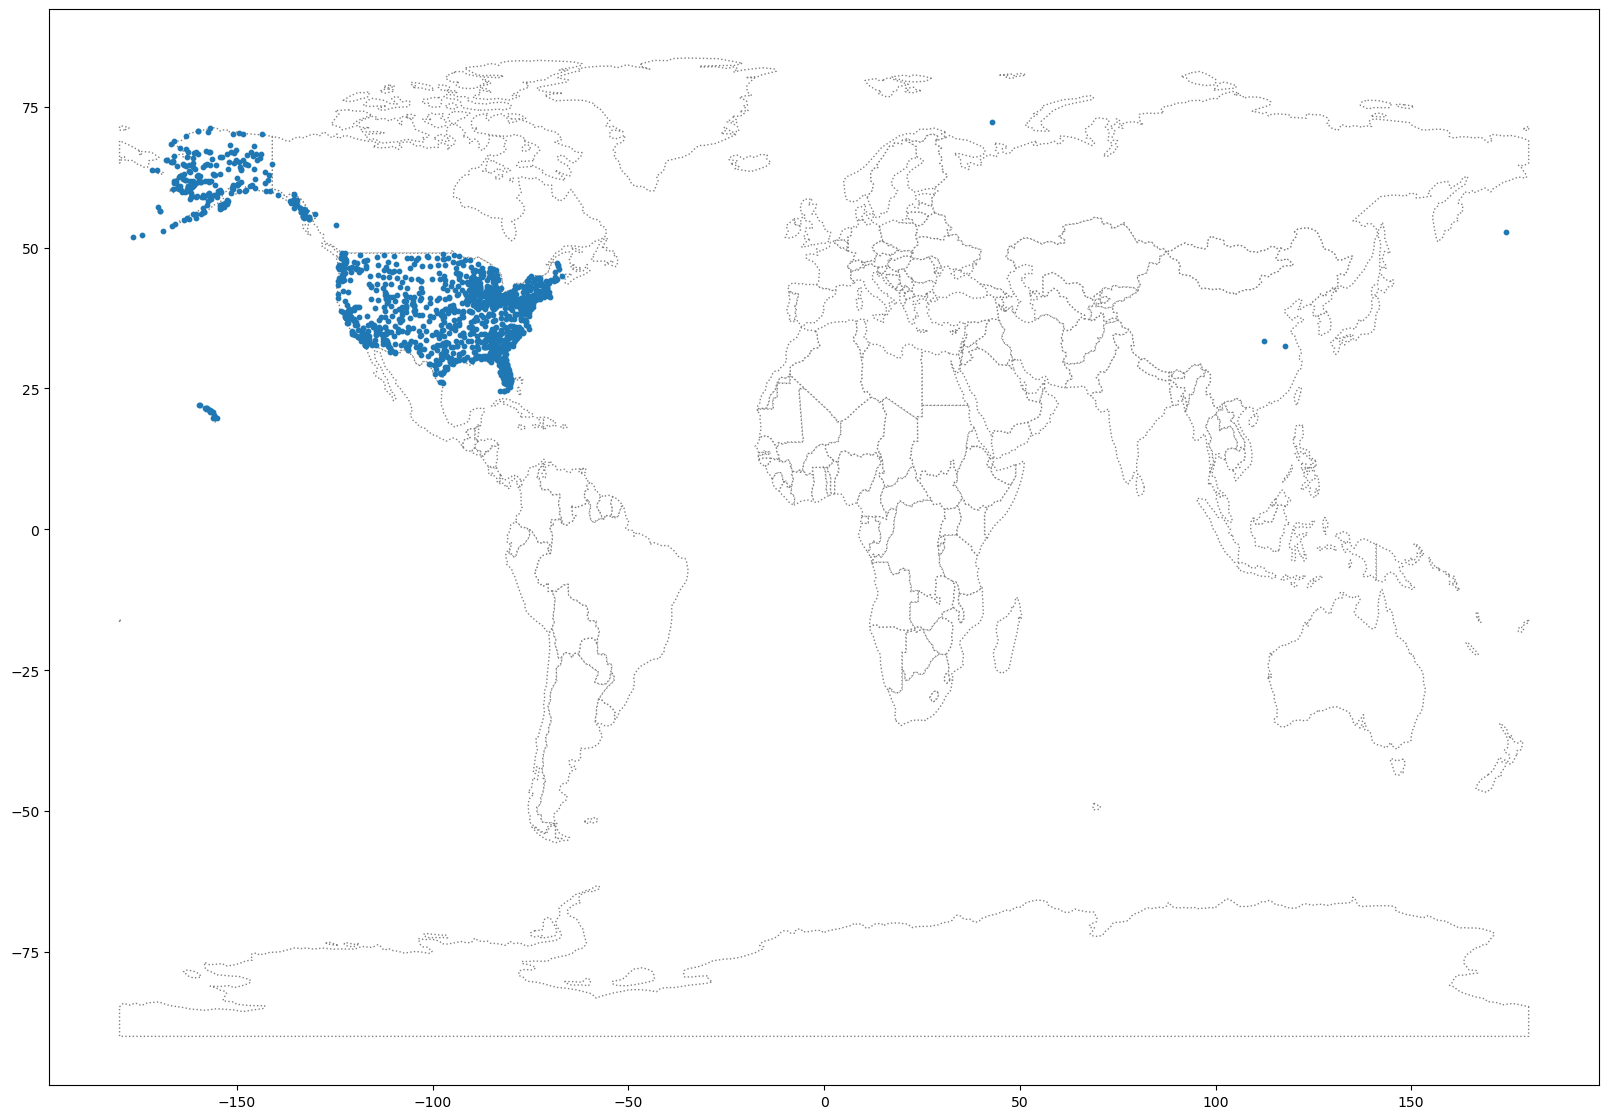

In [72]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,20), color='white', linestyle=':', edgecolor='gray')
GEOairports.plot(ax=ax, markersize=10)

In [95]:
flights_use = flights[["tailnum", "arr_delay", "flight", "origin", "dest", "distance"]]

farthest_airport2 = flights_use.drop_duplicates()\
.sort_values(by='distance', ascending=False)\
.set_index("dest")\
.join(airports.set_index("faa"))
delt_ave = farthest_airport2.groupby(['name','lat','lon']).mean("arr_delay").reset_index()
delt_ave2 = delt_ave[['name','lat','lon','arr_delay']]

In [96]:
GEOdelt_ave2 = gpd.GeoDataFrame(delt_ave2, geometry=gpd.points_from_xy(delt_ave2.lon, delt_ave2.lat))
GEOdelt_ave2.crs = {'init': 'epsg:4326'}

c:\Users\15499\anaconda3\envs\Geopandas\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


<AxesSubplot:>

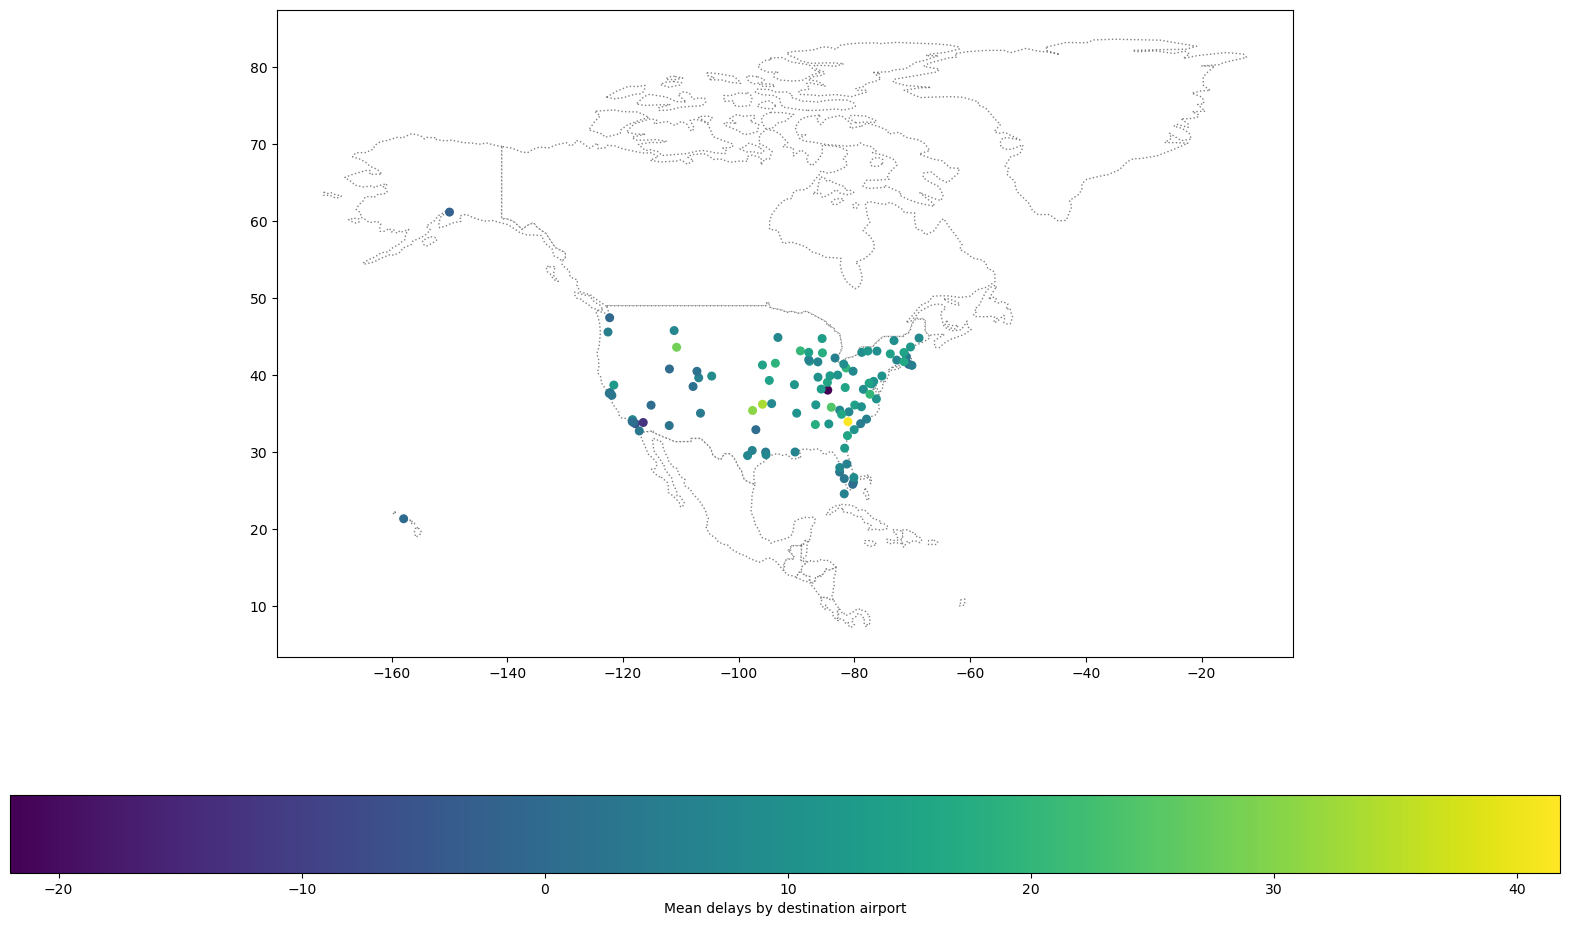

In [105]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
NortAmerica = world.loc[world['continent'].isin(['North America'])]
ax2 = NortAmerica.plot(figsize=(20,12), color='white', linestyle=':', edgecolor='gray')
GEOdelt_ave2.plot(ax=ax2, markersize=30, column='arr_delay', legend=True,legend_kwds={'label': "Mean delays by destination airport",'orientation': "horizontal"})